In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
from zipfile import ZipFile
import urllib.request
import os, sys, requests, csv
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import librosa 
import librosa.display
from IPython.display import Audio

/Users/preethi/miniconda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import wget

In [3]:
# !pip install wget

In [4]:
url = "https://tspace.library.utoronto.ca/handle/1807/24487"
response = requests.get(url)
response.status_code

In [5]:
def make_soup(url):
    response = requests.get(url)
    code = response.status_code
    assert ((code >= 200) & (code < 300))
    page = response.text
    soup = BeautifulSoup(page, 'lxml')
    return soup

In [6]:
soup = make_soup(url)

strongs = soup.find_all('strong')[1:]

hrefs = [x.find('a', href = True)['href'] for x in strongs]

In [9]:
link_list = []

for href in hrefs:
    url = "https://tspace.library.utoronto.ca" + href
    soup = make_soup(url)
    div = soup.find('div', {'class': 'item-files'})
    a_tags = div.find_all('a')
    links = [x['href'] for x in a_tags]
    link_list += links

In [10]:
url_list = ['https://tspace.library.utoronto.ca' + x for x in link_list]

In [11]:
with open('url_list.txt', 'w') as file:
    for url in url_list:
        file.write(url + '\n')
    file.close()

In [12]:
!wget --input-file=url_list.txt --directory-prefix=TESS/

In [13]:
ravdess_url = 'https://zenodo.org/record/1188976'

ravdess_url_data = requests.get(ravdess_url)
ravdess_url_data

In [14]:
html = BeautifulSoup(ravdess_url_data.text, 'html.parser')
articles = html.select('a.filename')

In [15]:
articles[1]

In [16]:
el=articles[1].get('href')
el

In [17]:
download_url="https://zenodo.org"+el
download_url

In [18]:
path = os.getcwd()
path

In [19]:
wget.download(download_url,out=path)

In [20]:
file_path = '/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24.zip'
path=path+'/Audio_Speech_Actors_01-24/'
path

In [21]:
with ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(path)

In [22]:
ravdess_path = '/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24/'

In [23]:
ravdess_directory_list = os.listdir(ravdess_path)
ravdess_directory_list.remove('.DS_Store')
file_emotion = []
file_path = []
#ravdess_directory_list.sort()
ravdess_directory_list

['Actor_16',
 'Actor_11',
 'Actor_18',
 'Actor_20',
 'Actor_21',
 'Actor_19',
 'Actor_10',
 'Actor_17',
 'Actor_04',
 'Actor_03',
 'Actor_02',
 'Actor_05',
 'Actor_12',
 'Actor_15',
 'Actor_23',
 'Actor_24',
 'Actor_22',
 'Actor_14',
 'Actor_13',
 'Actor_09',
 'Actor_07',
 'Actor_06',
 'Actor_01',
 'Actor_08']

In [24]:
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess_path + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess_path + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0    angry  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
1     fear  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
2     fear  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
3    angry  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
4  disgust  /Users/preethi/MS DS/Capstone Project/Audio_Sp...

In [25]:
tess = '/Users/preethi/MS DS/Capstone Project/TESS/'

In [26]:
tess_directory_list = os.listdir(tess)

file_emotion = []
file_path = []

In [27]:
for file in tess_directory_list:
    part = file.split('.')[0]
    part = part.split('_')[2]
    if part=='ps':
        file_emotion.append('surprise')
    else:
        file_emotion.append(part)
    file_path.append(tess + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    happy  /Users/preethi/MS DS/Capstone Project/TESS//YA...
1  disgust  /Users/preethi/MS DS/Capstone Project/TESS//OA...
2    happy  /Users/preethi/MS DS/Capstone Project/TESS//OA...
3  neutral  /Users/preethi/MS DS/Capstone Project/TESS//OA...
4     fear  /Users/preethi/MS DS/Capstone Project/TESS//YA...

In [28]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path.to_csv("data_path.csv", index=False)
data_path.head()

Emotions                                               Path
0    angry  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
1     fear  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
2     fear  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
3    angry  /Users/preethi/MS DS/Capstone Project/Audio_Sp...
4  disgust  /Users/preethi/MS DS/Capstone Project/Audio_Sp...

/Users/preethi/miniconda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


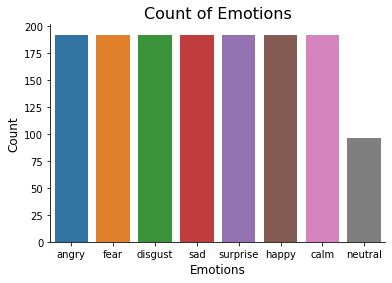

In [29]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df['Emotions'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

/Users/preethi/miniconda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


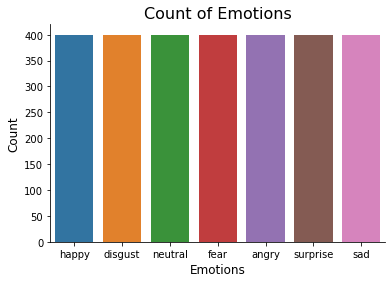

In [30]:
plt.title('Count of Emotions', size=16)
sns.countplot(Tess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

/Users/preethi/miniconda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


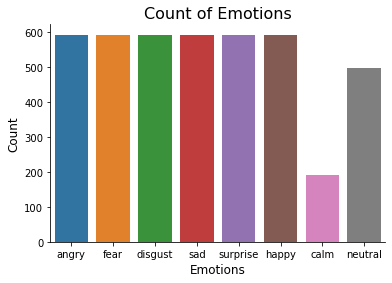

In [31]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [32]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.xlim([0,4])
    plt.ylim([-0.6,0.6])
    plt.show()

In [33]:
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

In [34]:
emotion = 'Angry'
path = ravdess_path + 'Actor_01/03-01-05-01-01-01-01.wav'
path

'/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24/Actor_01/03-01-05-01-01-01-01.wav'

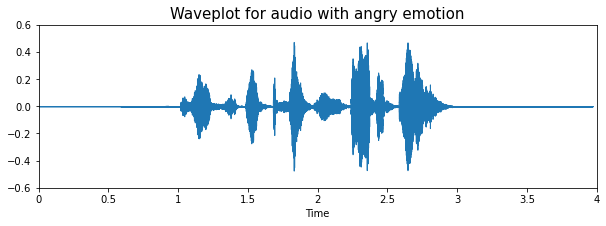

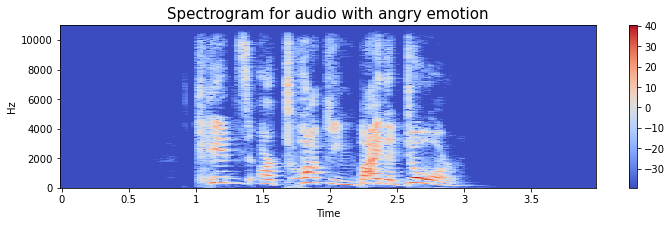

In [35]:
emotion = 'angry'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

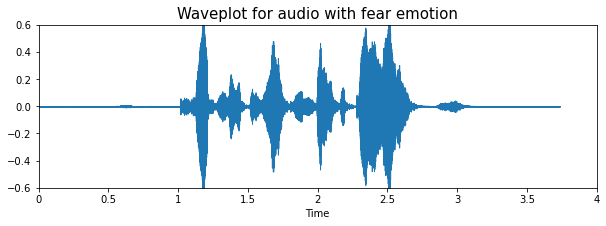

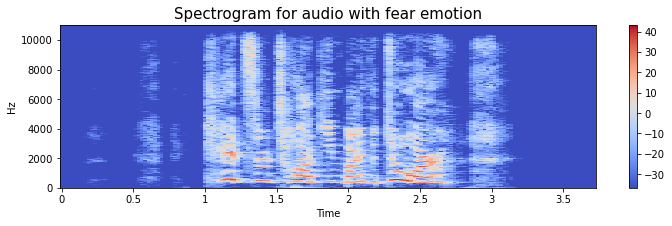

In [36]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

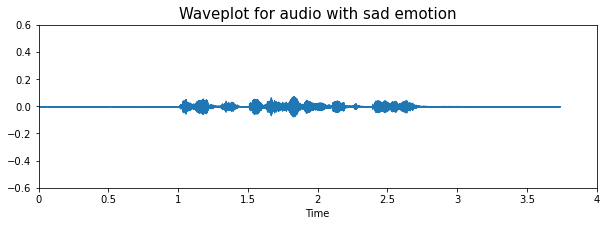

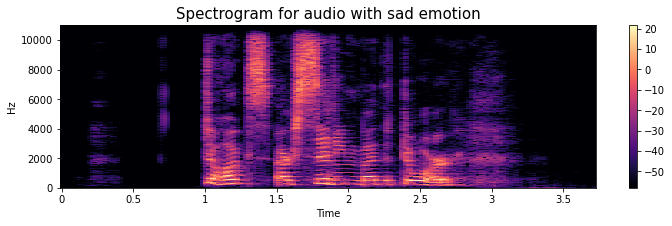

In [37]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

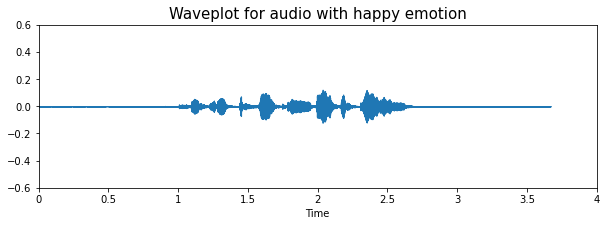

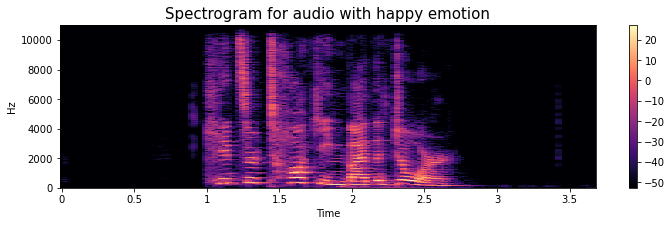

In [38]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [39]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size = data.shape[0])
    return data

In [40]:
def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(data, rate)

In [41]:
def shift(data):
    shift_range = int(np.random.uniform(low = -5, high = 5)*1000)
    return np.roll(data, shift_range)

In [42]:
def pitch(data, sampling_rate, pitch_factor = 0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [43]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[2]
data, sample_rate = librosa.load(path)

In [44]:
path

'/Users/preethi/MS DS/Capstone Project/Audio_Speech_Actors_01-24/Actor_16/03-01-06-02-01-02-16.wav'

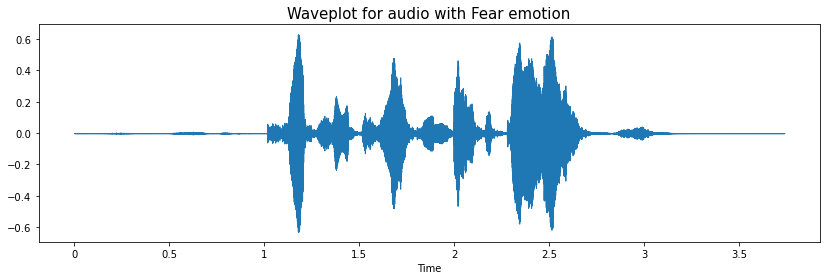

In [45]:
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = data, sr = sample_rate)
plt.title('Waveplot for audio with Fear emotion', size = 15)
Audio(path)

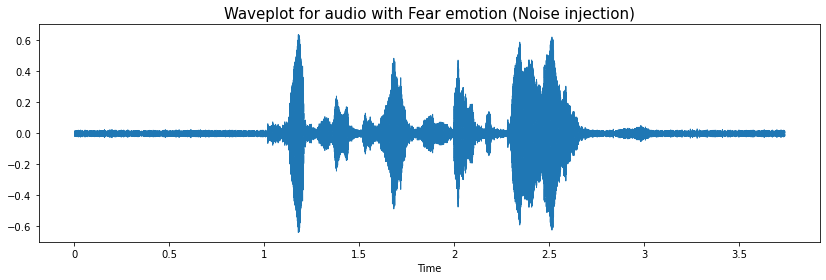

In [46]:
x = noise(data)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
plt.title('Waveplot for audio with Fear emotion (Noise injection)', size = 15)
Audio(x, rate = sample_rate)

<ipython-input-40-017f3dfeed79>:2: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


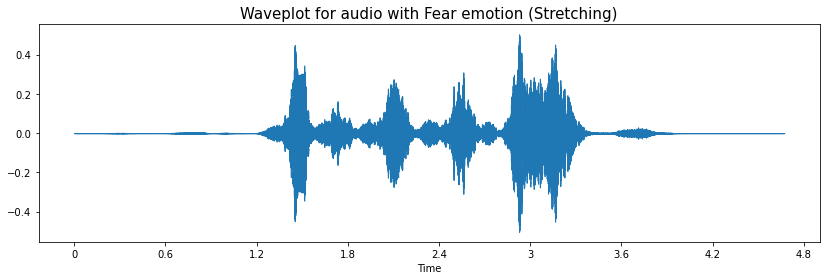

In [47]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Waveplot for audio with Fear emotion (Stretching)', size=15)
Audio(x, rate=sample_rate)

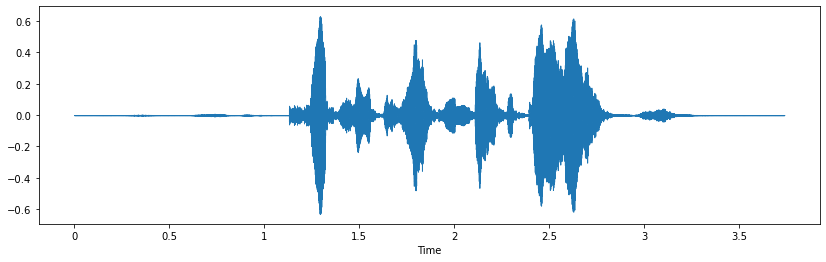

In [48]:
x = shift(data)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
Audio(x, rate = sample_rate)

<ipython-input-42-a74c9654cb76>:2: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


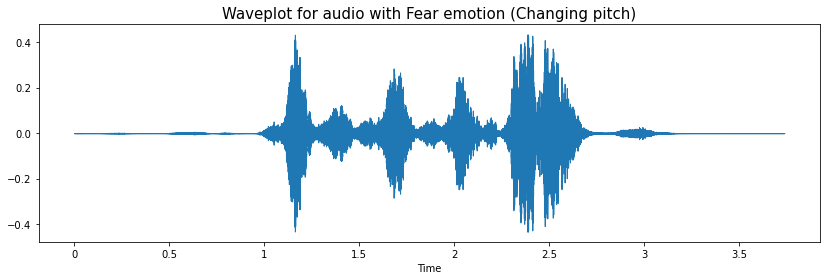

In [49]:
x = pitch(data, sample_rate)
plt.figure(figsize = (14,4))
librosa.display.waveshow(y = x, sr = sample_rate)
plt.title('Waveplot for audio with Fear emotion (Changing pitch)', size = 15)
Audio(x, rate = sample_rate)

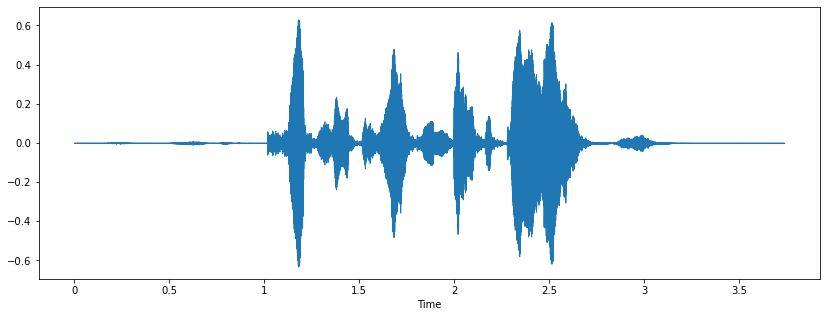

In [50]:
x, sr = data, sample_rate
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

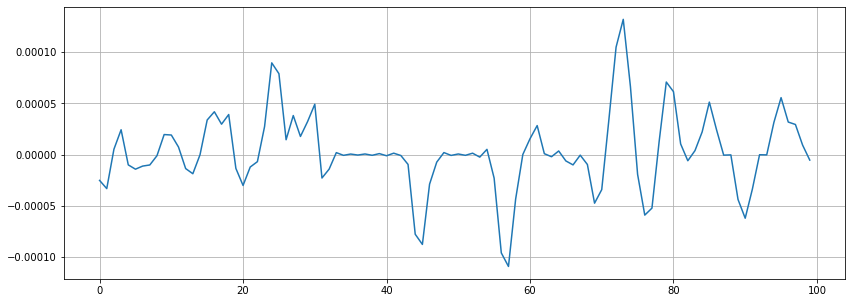

In [51]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

<ipython-input-52-c138a2a32910>:2: FutureWarning: Pass y=[ 2.9892044e-05  2.7444772e-05  1.0754259e-06 ... -1.0394923e-05
 -1.9240952e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(data, sr=sample_rate, n_mels=128)


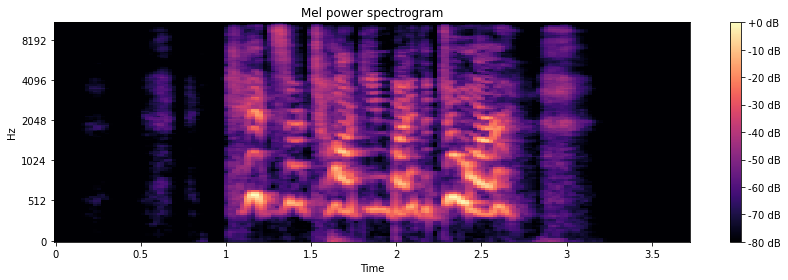

In [52]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(data, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

<ipython-input-53-6dbef8cfdd58>:3: FutureWarning: Pass y=[ 2.9892044e-05  2.7444772e-05  1.0754259e-06 ... -1.0394923e-05
 -1.9240952e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


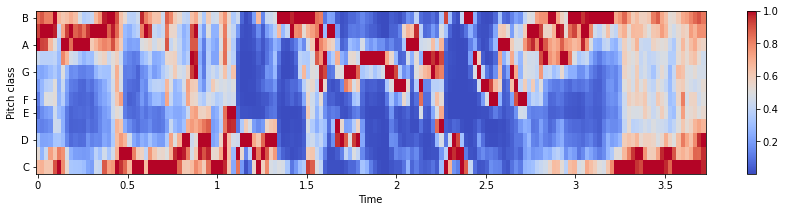

In [53]:
x, sr = data, sample_rate
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
fig.colorbar(img, ax=ax)

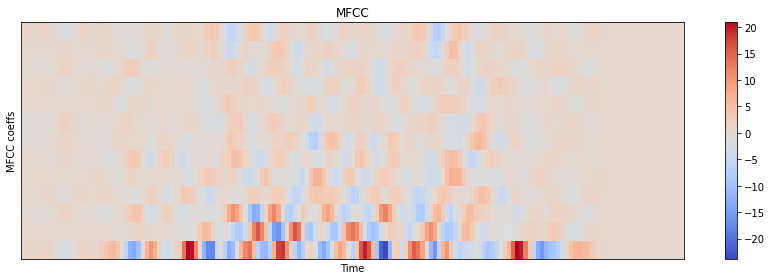

In [54]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [55]:
data.shape

(82403,)

In [56]:
mfcc.shape

(13, 161)

In [57]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [58]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start 
    # and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [59]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

<ipython-input-40-017f3dfeed79>:2: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
<ipython-input-42-a74c9654cb76>:2: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


In [60]:
len(X), len(Y), data_path.Path.shape

(12720, 12720, (4240,))

In [61]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index = False)
Features.shape

(12720, 163)

In [62]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [63]:
X1 = X
Y1 = Y

In [64]:
X2 = X1
Y2 = Y1

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

In [71]:
# encoder = LabelEncoder()
# # encoder = OneHotEncoder()
# Y_encoded = encoder.fit_transform(Y)
# Y = encoder.fit_transform(Y)

In [72]:
Y

array(['angry', 'angry', 'angry', ..., 'disgust', 'disgust', 'disgust'],
      dtype=object)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9540, 162), (9540,), (3180, 162), (3180,))

In [74]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, random_state=0, shuffle=True)
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((9540, 162), (9540,), (3180, 162), (3180,))

In [75]:
steps = [('scaler', StandardScaler()),
        ('DT', DecisionTreeClassifier(max_depth = 6))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
dt_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
dt_unscaled = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(dt_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(dt_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5877358490566038
Accuracy without Scaling: 0.5886792452830188


In [76]:
dt_pred_s = dt_scaled.predict(X_test)
dt_pred = dt_unscaled.predict(X_test)

In [77]:
# predicting on test data.
#pred_test = mlp_scaled.predict(X_test)
# y_pred = encoder.inverse_transform(dt_pred)

# y_test = encoder.inverse_transform(y_test)

In [78]:
print("Decision Tree Scaled")
print(classification_report(y_test, dt_pred_s))
print("Decision Tree Unscaled")
print(classification_report(y_test, dt_pred))

Decision Tree Scaled
              precision    recall  f1-score   support

       angry       0.75      0.55      0.63       466
        calm       0.53      0.40      0.46       154
     disgust       0.35      0.60      0.44       437
        fear       0.93      0.67      0.78       428
       happy       0.44      0.51      0.47       405
     neutral       0.96      0.73      0.83       393
         sad       0.71      0.64      0.67       452
    surprise       0.47      0.50      0.48       445

    accuracy                           0.59      3180
   macro avg       0.64      0.57      0.59      3180
weighted avg       0.65      0.59      0.60      3180

Decision Tree Unscaled
              precision    recall  f1-score   support

       angry       0.75      0.55      0.63       466
        calm       0.52      0.39      0.44       154
     disgust       0.35      0.60      0.44       437
        fear       0.93      0.67      0.78       428
       happy       0.44      0.51 

In [79]:
steps = [('scaler', StandardScaler()),
        ('RF', RandomForestClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
rf_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
rf_unscaled = RandomForestClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(rf_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(rf_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.8679245283018868
Accuracy without Scaling: 0.8738993710691824


In [80]:
rf_pred_s = rf_scaled.predict(X_test)
rf_pred = rf_unscaled.predict(X_test)

In [81]:
print("Random Forest Scaled")
print(classification_report(y_test, rf_pred_s))
print("Random Forest Unscaled")
print(classification_report(y_test, rf_pred))

Random Forest Scaled
              precision    recall  f1-score   support

       angry       0.93      0.87      0.90       466
        calm       0.65      0.90      0.75       154
     disgust       0.79      0.89      0.84       437
        fear       0.91      0.86      0.88       428
       happy       0.91      0.81      0.86       405
     neutral       0.96      0.90      0.93       393
         sad       0.86      0.86      0.86       452
    surprise       0.85      0.88      0.86       445

    accuracy                           0.87      3180
   macro avg       0.86      0.87      0.86      3180
weighted avg       0.88      0.87      0.87      3180

Random Forest Unscaled
              precision    recall  f1-score   support

       angry       0.94      0.88      0.91       466
        calm       0.67      0.88      0.76       154
     disgust       0.78      0.89      0.83       437
        fear       0.93      0.86      0.89       428
       happy       0.91      0.83 

In [82]:
# # rf_pred = mlp_scaled.predict(X_test)
# y1_pred = encoder.inverse_transform(rf_pred)

# y1_test = encoder.inverse_transform(y_test)

In [83]:
# print(classification_report(y_test,rf_pred))

In [84]:
# import keras

In [85]:
# !pip install tensorflow

In [86]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('MLP', MLPClassifier(alpha=0.01, 
                              batch_size=256, 
                              epsilon=1e-08, 
                              hidden_layer_sizes=(300,),
                              learning_rate='adaptive',
                              max_iter=500))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: mlp_scaled
mlp_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a MLP classifier to the unscaled data
mlp_unscaled =  MLPClassifier(alpha=0.01, 
                              batch_size=256, 
                              epsilon=1e-08, 
                              hidden_layer_sizes=(300,),
                              learning_rate='adaptive',
                              max_iter=500).fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(mlp_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(mlp_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.9047169811320754
Accuracy without Scaling: 0.8393081761006289


In [87]:
mlp_pred_s = mlp_scaled.predict(X_test)
mlp_pred = mlp_unscaled.predict(X_test)

In [88]:
print("MLP Classifier Scaled")
print(classification_report(y_test, mlp_pred_s))
print("MLP Classifier Unscaled")
print(classification_report(y_test, mlp_pred))

MLP Classifier Scaled
              precision    recall  f1-score   support

       angry       0.94      0.89      0.91       466
        calm       0.86      0.85      0.86       154
     disgust       0.89      0.93      0.91       437
        fear       0.91      0.91      0.91       428
       happy       0.87      0.89      0.88       405
     neutral       0.93      0.95      0.94       393
         sad       0.88      0.89      0.88       452
    surprise       0.93      0.91      0.92       445

    accuracy                           0.90      3180
   macro avg       0.90      0.90      0.90      3180
weighted avg       0.91      0.90      0.90      3180

MLP Classifier Unscaled
              precision    recall  f1-score   support

       angry       0.86      0.91      0.89       466
        calm       0.66      0.74      0.70       154
     disgust       0.85      0.80      0.82       437
        fear       0.95      0.83      0.89       428
       happy       0.75      0.8

In [89]:
# print(classification_report(y_test,pred_test))

In [90]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9540, 162), (9540, 8), (3180, 162), (3180, 8))

In [92]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
X_train_s.shape, y_train.shape, X_test_s.shape, y_test.shape

((9540, 162), (9540, 8), (3180, 162), (3180, 8))

In [93]:
X_train_d = np.expand_dims(X_train_s, axis=2)
X_test_d = np.expand_dims(X_test_s, axis=2)
X_train_d.shape, y_train.shape, X_test_d.shape, y_test.shape

((9540, 162, 1), (9540, 8), (3180, 162, 1), (3180, 8))

In [94]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

In [104]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train_d.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [105]:
history = model.fit(X_train_d, y_train, batch_size=64, epochs=50, validation_data=(X_test_d, y_test))

Epoch 1/50
150/150 [==============================] - 7s 33ms/step - loss: 1.5997 - accuracy: 0.3936 - val_loss: 1.2386 - val_accuracy: 0.5711
Epoch 2/50
150/150 [==============================] - 5s 31ms/step - loss: 1.1442 - accuracy: 0.5835 - val_loss: 0.9201 - val_accuracy: 0.6604
Epoch 3/50
150/150 [==============================] - 5s 31ms/step - loss: 0.9833 - accuracy: 0.6432 - val_loss: 0.8187 - val_accuracy: 0.6975
Epoch 4/50
150/150 [==============================] - 5s 30ms/step - loss: 0.8580 - accuracy: 0.6864 - val_loss: 0.7339 - val_accuracy: 0.7308
Epoch 5/50
150/150 [==============================] - 5s 30ms/step - loss: 0.7970 - accuracy: 0.7068 - val_loss: 0.6964 - val_accuracy: 0.7484
Epoch 6/50
150/150 [==============================] - 5s 30ms/step - loss: 0.7438 - accuracy: 0.7226 - val_loss: 0.6703 - val_accuracy: 0.7566
Epoch 7/50
150/150 [==============================] - 5s 34ms/step - loss: 0.7149 - accuracy: 0.7346 - val_loss: 0.6221 - val_accuracy: 0.7767

100/100 [==============================] - 1s 11ms/step - loss: 0.4559 - accuracy: 0.8660
Accuracy of our model on test data :  86.60377264022827 %


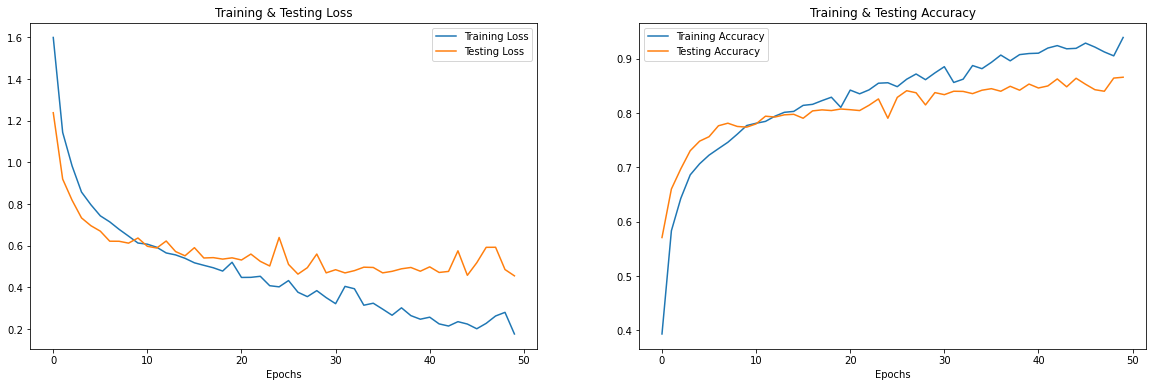

In [106]:
print("Accuracy of our model on test data : " , model.evaluate(X_test_d,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [107]:
cnn_test = model.predict(X_test_d)
cnn_pred = encoder.inverse_transform(cnn_test)

100/100 [==============================] - 1s 9ms/step


In [108]:
y_test = encoder.inverse_transform(y_test)

In [109]:
print(classification_report(y_test, cnn_pred))

              precision    recall  f1-score   support

       angry       0.90      0.90      0.90       466
        calm       0.72      0.86      0.78       154
     disgust       0.89      0.80      0.84       437
        fear       0.85      0.91      0.88       428
       happy       0.79      0.86      0.82       405
     neutral       0.92      0.87      0.89       393
         sad       0.89      0.82      0.85       452
    surprise       0.89      0.91      0.90       445

    accuracy                           0.87      3180
   macro avg       0.86      0.87      0.86      3180
weighted avg       0.87      0.87      0.87      3180



In [123]:
cnn_test.shape

(3180, 8)

In [95]:
mlp_gs = MLPClassifier(max_iter = 500)
parameter_space = {
    'hidden_layer_sizes': [(300,350)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
    'batch_size' : [200, 256],
    'epsilon' : [1e-08]
}
# (alpha=0.01, 
#                               batch_size=256, 
#                               epsilon=1e-08, 
#                               hidden_layer_sizes=(300,),
#                               learning_rate='adaptive',
#                               max_iter=500
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

In [96]:
clf.fit(X_train_s, y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'], 'alpha': [0.01, 0.05],
                         'batch_size': [200, 256], 'epsilon': [1e-08],
                         'hidden_layer_sizes': [(300, 350)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [97]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'batch_size': 200, 'epsilon': 1e-08, 'hidden_layer_sizes': (300, 350), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [98]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.770 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 200, 'epsilon': 1e-08, 'hidden_layer_sizes': (300, 350), 'learning_rate': 'constant', 'solver': 'sgd'}
0.869 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 200, 'epsilon': 1e-08, 'hidden_layer_sizes': (300, 350), 'learning_rate': 'constant', 'solver': 'adam'}
0.771 (+/-0.017) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 200, 'epsilon': 1e-08, 'hidden_layer_sizes': (300, 350), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.872 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 200, 'epsilon': 1e-08, 'hidden_layer_sizes': (300, 350), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.755 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 256, 'epsilon': 1e-08, 'hidden_layer_sizes': (300, 350), 'learning_rate': 'constant', 'solver': 'sgd'}
0.868 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 256, 'epsilon': 1e-08, 'hidden_layer_sizes': 

In [120]:
y_pred_mlp = clf.predict(X_test_s)

In [122]:
y_pred_mlp.shape

(3180, 8)

In [ ]:
# y_pred_mlp = encoder.inverse_transform(y_pred_mlp)

In [126]:
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

In [127]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       466
           1       0.87      0.88      0.88       154
           2       0.92      0.89      0.91       437
           3       0.92      0.92      0.92       428
           4       0.91      0.89      0.90       405
           5       0.94      0.95      0.94       393
           6       0.95      0.84      0.89       452
           7       0.94      0.93      0.93       445

   micro avg       0.93      0.90      0.92      3180
   macro avg       0.93      0.90      0.91      3180
weighted avg       0.93      0.90      0.92      3180
 samples avg       0.89      0.90      0.89      3180



/Users/preethi/miniconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10)
# clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# for train_indices, test_indices in kf.split(X):
#     clf.fit(X[train_indices], Y[train_indices])
#     print(clf.score(X[test_indices], Y[test_indices]))

In [ ]:
# !pip install pydub
# !pip install noisereduce
# !pip install pyaudio
# !pip install json-tricks

In [ ]:
# !pip install PyAudio==0.2.11

In [ ]:
# !pip install wave

In [132]:
import pyaudio
import wave

CHUNK = 512 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 1 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [134]:
data, sampling_rate = librosa.load('output10.wav')
Audio(data, rate = sample_rate)

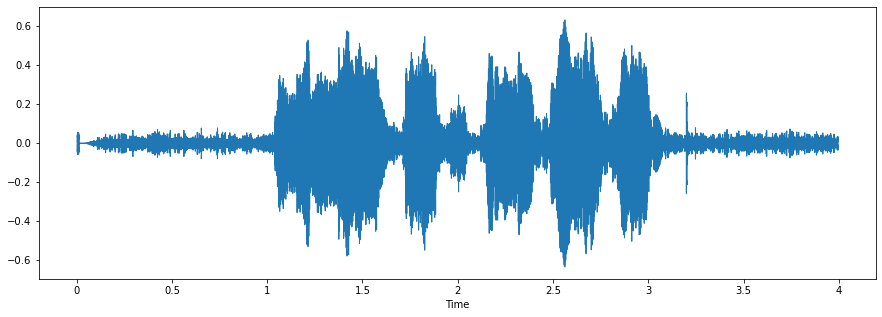

In [135]:
# %pylab inline
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [136]:
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [137]:
test_df = extract_features(data)

In [138]:
test_df.shape

(162,)

In [139]:
test_df = pd.DataFrame(data=test_df)

In [140]:
test_df = test_df.stack().to_frame().T

In [141]:
test_df

0        1         2         3         4         5         6    \
          0        0         0         0         0         0         0   
0  0.059181  0.57966  0.542568  0.542048  0.525129  0.589754  0.626714   

        7         8         9    ...       152       153      154       155  \
          0         0         0  ...         0         0        0         0   
0  0.505486  0.492996  0.561573  ...  0.004095  0.004946  0.00213  0.001152   

        156       157       158       159       160           161  
          0         0         0         0         0             0  
0  0.000994  0.000308  0.000265  0.000222  0.000036  4.916519e-07  

[1 rows x 162 columns]

In [142]:
livepreds = mlp_scaled.predict(test_df)

In [144]:
print(livepreds)

['happy']
